In [1]:
# Show current path
from pathlib import Path
print(Path.cwd())

/Users/onepinch/Workspace/tas-art/scenario


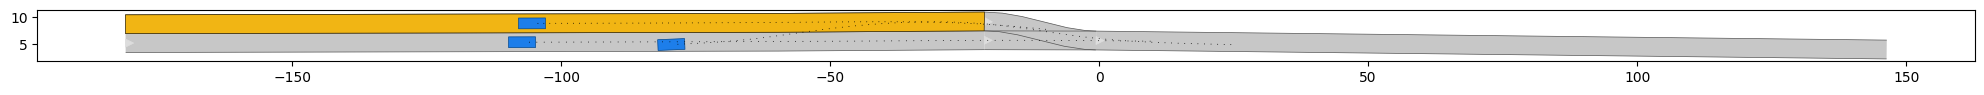

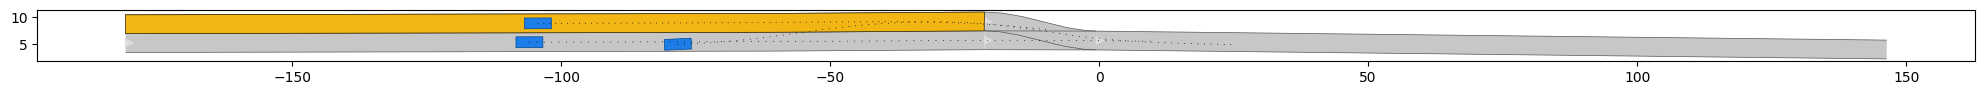

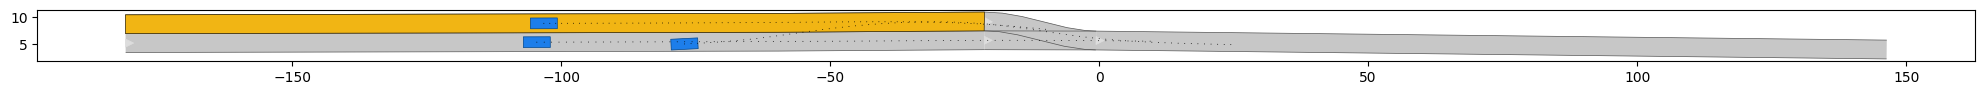

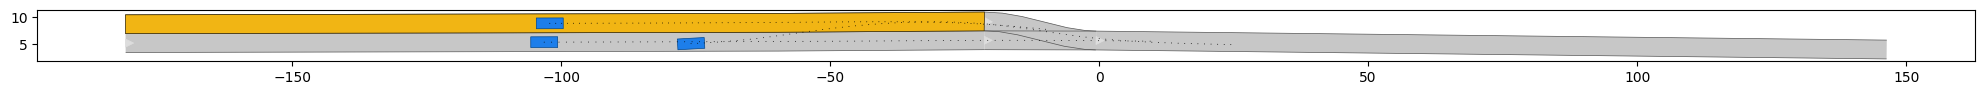

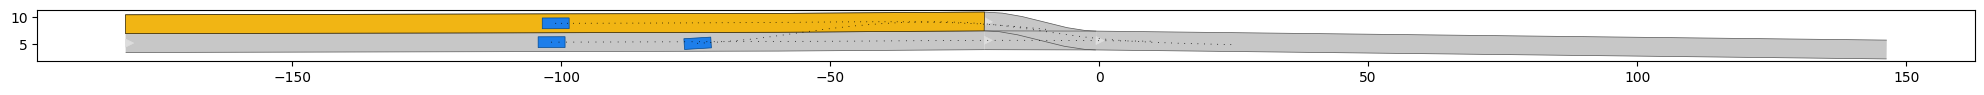

In [2]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

# Yuhui: note the mathplotlib need to be < 3.6. See in the requirements.txt
# generate path of the file to be opened, also the following fix for latent error.
from commonroad.visualization.draw_params import MPDrawParams
# file_path = "./examples/ZAM_Tutorial-1_1_T-1.xml"
file_path = "./examples/ZAM_Zip-1_9_T-1.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 5):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    # plot the scenario at different time step

    # Yuhui: following the latest fix from https://gitlab.lrz.de/tum-cps/commonroad-interactive-scenarios/-/commit/1e3911b5b4376c8e30b3986bd0ec63d4f63eabda
    draw_params = MPDrawParams()
    draw_params.time_begin = i
    scenario.draw(rnd, draw_params=draw_params)

    # plot the planning problem set
    planning_problem_set.draw(rnd)
    rnd.render()

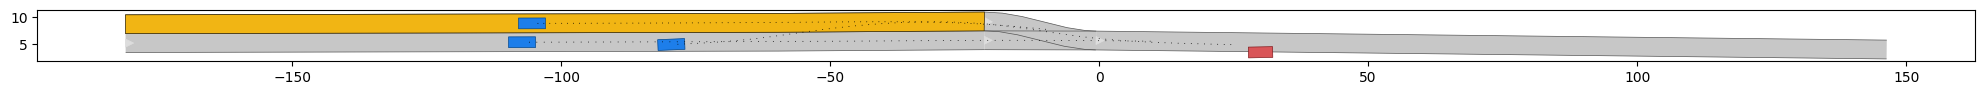

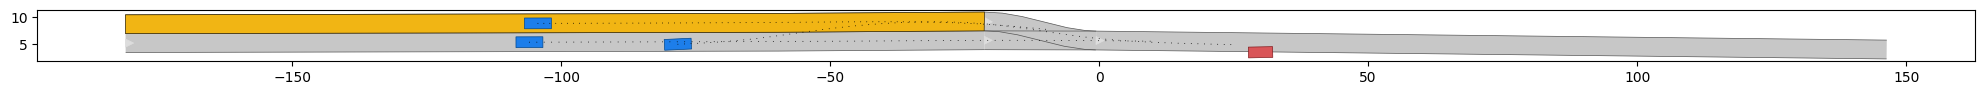

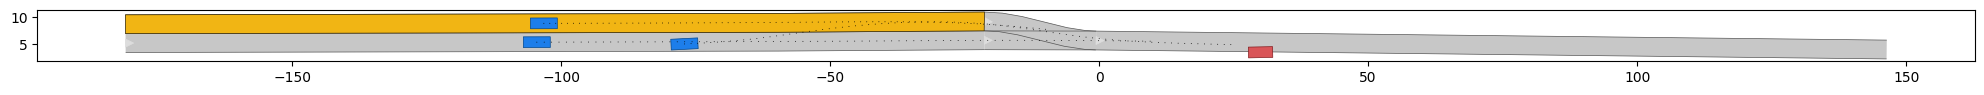

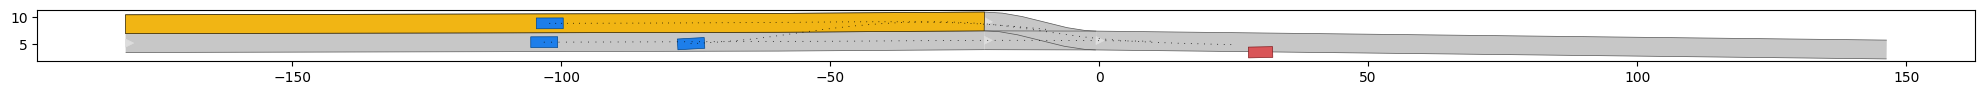

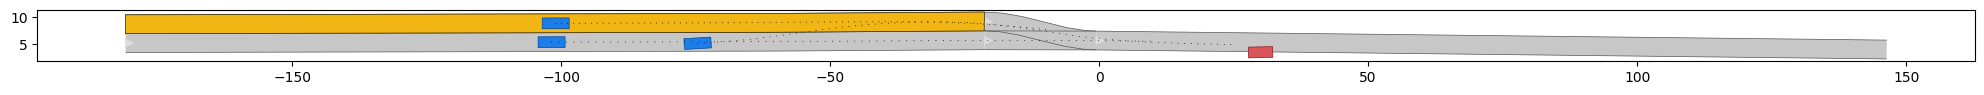

In [4]:
import numpy as np

# import necessary classes from different modules
from commonroad.geometry.shape import Rectangle
from commonroad.scenario.obstacle import StaticObstacle, ObstacleType
from commonroad.scenario.trajectory import CustomState
from commonroad.scenario.trajectory import InitialState

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# generate the static obstacle according to the specification, refer to API for details of input parameters
static_obstacle_id = scenario.generate_object_id()
static_obstacle_type = ObstacleType.PARKED_VEHICLE
static_obstacle_shape = Rectangle(width = 2.0, length = 4.5)

static_obstacle_initial_state = InitialState(position = np.array([30.0, 3.5]), orientation = 0.02, time_step = 0)

# feed in the required components to construct a static obstacle
static_obstacle = StaticObstacle(static_obstacle_id, static_obstacle_type, static_obstacle_shape, static_obstacle_initial_state)

# add the static obstacle to the scenario
scenario.add_objects(static_obstacle)

# plot the scenario for each time step
for i in range(0, 5):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()

    draw_params = MPDrawParams()
    draw_params.time_begin = i
    scenario.draw(rnd, draw_params=draw_params)

    # plot the planning problem set
    planning_problem_set.draw(rnd)
    rnd.render()


In [34]:
from scipy.integrate import odeint
import numpy

from vehiclemodels.init_ks import init_ks
from vehiclemodels.parameters_vehicle2 import parameters_vehicle2
from vehiclemodels.vehicle_dynamics_ks import vehicle_dynamics_ks


In [36]:
tStart = 0  # start time
tFinal = 1  # start time

def func_KS(x, t, u, p):
    f = vehicle_dynamics_ks(x, u, p)
    return f


# load vehicle parameters
p = parameters_vehicle2()

# initial state for simulation
delta0 = 0
vel0 = 15
Psi0 = 0
sy0 = 0
initialState = [0, sy0, delta0, vel0, Psi0]
x0_KS = init_ks(initialState)

t = numpy.arange(0, tFinal, 0.01)
u1 = [-0.3, 1]
u2 = [-0.1, 10]
u3 = [0.2, 5]


x1 = odeint(func_KS, x0_KS, t, args=(u1, p))
x2 = odeint(func_KS, x0_KS, t, args=(u2, p))
x3 = odeint(func_KS, x0_KS, t, args=(u3, p))


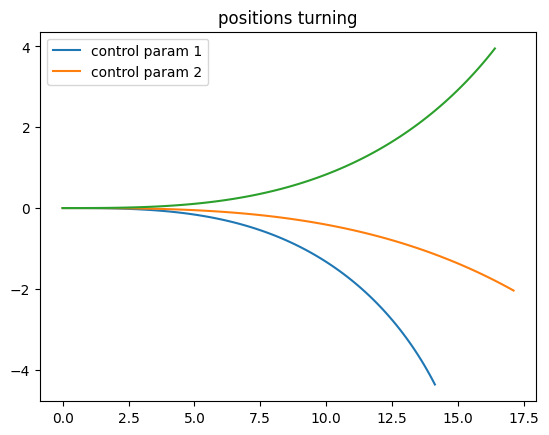

In [37]:
from matplotlib.pyplot import title, legend

title('positions turning')
plt.plot([tmp[0] for tmp in x1], [tmp[1] for tmp in x1])
plt.plot([tmp[0] for tmp in x2], [tmp[1] for tmp in x2])
plt.plot([tmp[0] for tmp in x3], [tmp[1] for tmp in x3])

legend(['control param 1', 'control param 2'])
plt.autoscale()
plt.show()

In [97]:
import copy

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(n, c1 = '#FF0000', c2='#000FFF'):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]



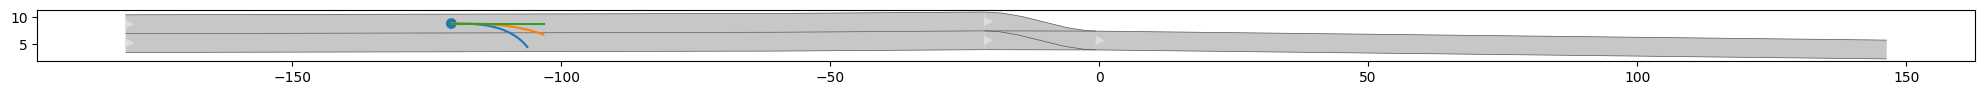

In [95]:
file_path = "./examples/ZAM_Zip-1_35_T-1.xml"


import matplotlib.pyplot as plt
from IPython import display
import numpy as np
# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer
from commonroad.visualization.draw_params import MPDrawParams
import copy

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()
road = copy.deepcopy(scenario)

# plt.figure()
fig, ax = plt.subplots(figsize=(25, 10))

road.remove_obstacle(road.dynamic_obstacles)
road.remove_obstacle(road.static_obstacles)
for i in range(0, 1):
    rnd = MPRenderer()
    # plot the scenario at different time step

    # Yuhui: following the latest fix from https://gitlab.lrz.de/tum-cps/commonroad-interactive-scenarios/-/commit/1e3911b5b4376c8e30b3986bd0ec63d4f63eabda
    draw_params = MPDrawParams()
    draw_params.time_begin = i
    road.draw(rnd, draw_params=draw_params)

    # plot the planning problem set
    # planning_problem_set.draw(rnd)
    rnd.render()

# plot holes
final_ts = 1
for agent in scenario.dynamic_obstacles:
    final_time_step = agent.prediction.final_time_step
    if final_time_step > final_ts:
        final_ts = final_time_step

color_idx = get_color_gradient(final_time_step)

safe_distance = 3
# plot holes
for agent in scenario.dynamic_obstacles:
    states = agent.prediction
    t_start = states.initial_time_step
    t_final = states.final_time_step
    trajectory = states.trajectory.state_list
    for pos in trajectory:
        # get color in range
        c = color_idx[pos.time_step - 1]
        hole = plt.Circle((pos.position[0],pos.position[1]), safe_distance, color=c, zorder=10)
        ax.add_artist(hole)

# plot ego
egp_pos = list(planning_problem_set.planning_problem_dict.values())[0].initial_state.position
ego = plt.Circle((egp_pos[0], egp_pos[1]), 1,  zorder=20)
ax.add_artist(ego)

initialState = [egp_pos[0], egp_pos[1], delta0, vel0, Psi0]
x0_KS = init_ks(initialState)

t = numpy.arange(0, tFinal, 0.01)
u1 = [-0.3, 1]
u2 = [-0.1, 10]
u3 = [0, 5]

x1 = odeint(func_KS, x0_KS, t, args=(u1, p))
x2 = odeint(func_KS, x0_KS, t, args=(u2, p))
x3 = odeint(func_KS, x0_KS, t, args=(u3, p))
plt.plot([tmp[0] for tmp in x1], [tmp[1] for tmp in x1],  zorder=20)
plt.plot([tmp[0] for tmp in x2], [tmp[1] for tmp in x2],  zorder=20)
plt.plot([tmp[0] for tmp in x3], [tmp[1] for tmp in x3], zorder=20)

plt.show()

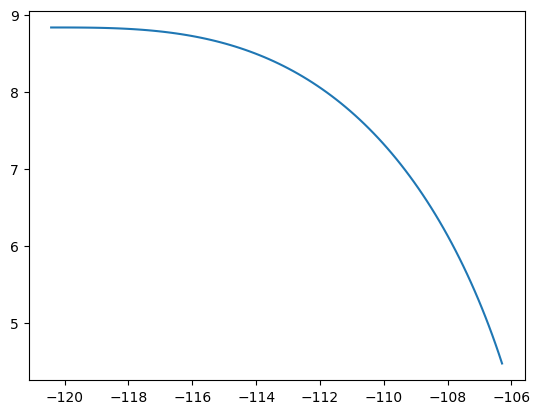

In [86]:
plt.plot([tmp[0] for tmp in x1], [tmp[1] for tmp in x1])


array([-120.42276  ,    8.8361644])

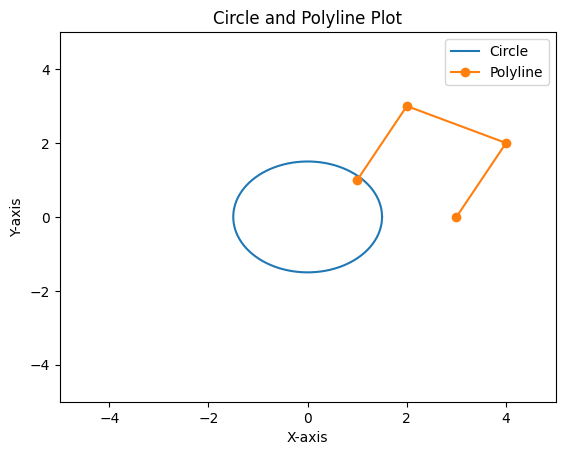

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting a circle
def plot_circle(center, radius):
    theta = np.linspace(0, 2*np.pi, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    plt.plot(x, y, label='Circle')

# Plotting a polyline
def plot_polyline(points):
    x, y = zip(*points)
    plt.plot(x, y, label='Polyline', marker='o')

# Example data
circle_center = (0, 0)
circle_radius = 1.5

polyline_points = [(1, 1), (2, 3), (4, 2), (3, 0)]

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting the circle and polyline
plot_circle(circle_center, circle_radius)
plot_polyline(polyline_points)

# Set axis limits for better visualization
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Adding labels and legend
plt.title('Circle and Polyline Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()
